## Анализ поведения пользователей мобильного приложения "Ненужные вещи"

      "Ненужные вещи" - это мобильное приложение, где люди могут продавать свои ненужные вещи путем размещения объявлений.
      Перед продакт-менеджером стоит задача повысить вовлеченность пользователей в приложение. 
 
      В распоряжении данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года. Планируется,
      что выводы, полученные при анализе особенностей пользовательского поведения, будут использоваться для дальнейшей
      выработки гиппотез. 

## Цель, задачи и алгоритм действий

     Цель исследования - выявить, какие события влияют на конверсию в целевое событие — просмотра контактов, а также 
     обнаружить основные сценарии использования приложения. 

    Задачи исследования: 
    -найти характерные черты между пользователями, которые просматривают контакты;
    -обнаружить эффективные и неэффективны с точки зрения конверсии события.
    
    Для решения поставленной задачи будет выполнены следующие шаги:
    -открытие и изучение файла;
    -предобработка данных, включающая в себя изучение типов данных в датафреймах, его изменение в случае необходимости,
    проверка датафреймов на наличие пропусков, дубликатов(как явных, так и неявных), а также объединение датафреймов и 
    добавление новых столбцов(с днем, номером недели и датой начала недели);
    -выявление количества логов, а также уникальных пользователей в датафрейме; 
    -изучение периода проведения эксперимента, в частности выявление даты его начала и завершения;
    -выявление среднего и медианного количества событий на пользователя;
    -изучение источников привлечения пользователей посредством построения сводной таблицы и столбчатой диаграммы;
    -изучение частоты событий посредством построения сводной таблицы и столбчатой диаграмму;
    -выявление количества пользователей, совершивших целевое действие;
    -выявление среднего значения тайм-аута и последующее выявление количества сессий;
    -изучение таких показателей как DAU и WAU;
    -построение диаграммы Санкея для выявления наиболее распространенных сценариев совершения целевого действия;
    -расчет конверсии для пользователей, которые дошли до целевого действия по разным сценариям;
    -построение воронок событий;
    -статистический анализ данных, включающий в себя проверку 2 гипотез:
    
    Гипотеза 1(нулевая): "конверсия у пользователей, совершающих действия и tips_show и tips_click, и тех, кто
    совершает только tips_show, одинакова"; 
    Гипотеза 1(альтернативная): "Альтернативная гипотеза -  "конверсия в просмотры контактов различается у пользователей, 
    совершающих действия и tips_show и tips_click, и тех, кто, кто совершает только tips_show".
    
    Гипотеза 2(нулевая): "конверсия у пользователей; просмотревших фотографии, и тех, кто пропустил этот шаг, одинаковая".
    Гипотеза 2 (альтернативная): "cуществуют значимые различия в конверсии у пользователей; просмотревших фотографии, и тех,
    кто пропустил этот шаг".
    
    

## Изучение файлов и предобработка данных

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import requests
from urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(category=InsecureRequestWarning)
from tqdm import tqdm
from scipy import stats as st
import math as mth# импортируем библиотеку scipy для статистического анализа

In [2]:
mobile_sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv') 
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

**Напишем функции, чтобы вывести на экран всю основную информацию о датафреймах.**

In [3]:
def data_info_1(mobile_sources):
      display(mobile_sources.head()), mobile_sources.info(), display(mobile_sources.describe),print(mobile_sources.duplicated().sum())
        
data_info_1(mobile_sources);

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


<bound method NDFrame.describe of                                     userId  source
0     020292ab-89bc-4156-9acf-68bc2783f894   other
1     cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2     8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3     d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4     f32e1e2a-3027-4693-b793-b7b3ff274439  google
...                                    ...     ...
4288  b86fe56e-f2de-4f8a-b192-cd89a37ecd41  yandex
4289  424c0ae1-3ea3-4f1e-a814-6bac73e48ab1  yandex
4290  437a4cd4-9ba9-457f-8614-d142bc48fbeb  yandex
4291  c10055f0-0b47-477a-869e-d391b31fdf8f  yandex
4292  d157bffc-264d-4464-8220-1cc0c42f43a9  google

[4293 rows x 2 columns]>

0


**В датафрейме mobile_sources отсутствуют пропуски. Типы данных в порядке. Явные дубликаты отсутствуют.**

**Перейдем к датафрейму mobile_dataset.**

In [4]:
def data_info_2(mobile_dataset):
      display(mobile_dataset.head()), mobile_dataset.info(), display(mobile_dataset.describe),print(mobile_dataset.duplicated().sum())
        
data_info_2(mobile_dataset);

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


<bound method NDFrame.describe of                        event.time   event.name  \
0      2019-10-07 00:00:00.431357  advert_open   
1      2019-10-07 00:00:01.236320    tips_show   
2      2019-10-07 00:00:02.245341    tips_show   
3      2019-10-07 00:00:07.039334    tips_show   
4      2019-10-07 00:00:56.319813  advert_open   
...                           ...          ...   
74192  2019-11-03 23:53:29.534986    tips_show   
74193  2019-11-03 23:54:00.407086    tips_show   
74194  2019-11-03 23:56:57.041825     search_1   
74195  2019-11-03 23:57:06.232189    tips_show   
74196  2019-11-03 23:58:12.532487    tips_show   

                                    user.id  
0      020292ab-89bc-4156-9acf-68bc2783f894  
1      020292ab-89bc-4156-9acf-68bc2783f894  
2      cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3      020292ab-89bc-4156-9acf-68bc2783f894  
4      cf7eda61-9349-469f-ac27-e5b6f5ec475c  
...                                     ...  
74192  28fccdf4-7b9e-42f5-bc73-439a265f20e9

0


**В mobile_dataset также отсутствуют дубликаты. Есть проблемы с типом данных столбца event_name; он должен быть временных. Явные дубликаты отсутствуют.**

**Изменим тип данных в столбце со временем событий. Также избавимся от миллисекунд.**

In [5]:
mobile_dataset['event.time'] = pd.to_datetime(mobile_dataset['event.time'])

**Для удобства добавим нижние подчеркивания в названия столбцов.**

In [6]:
mobile_sources.columns = ['user_id',
                          'source'
                         ]

mobile_dataset.columns = ['event_time',
                          'event_name',
                          'user_id'
                         ]

**В датафрейм mobile_dataset добавим столбец, в котором будет отображаться дата события. Это нужно для визуализации динамики событий.**

In [7]:
mobile_dataset['dt'] = mobile_dataset['event_time'].dt.date

**Также добавим столбец с номером недели и датой начала недели. Это пригодится для изучения пользовательской активности во времени.**

In [8]:
mobile_dataset['week_number'] = mobile_dataset['event_time'].dt.week


In [9]:
mobile_dataset['week_start'] = mobile_dataset['event_time'].dt.to_period('W').apply(lambda r: r.start_time)


**Изучим названия источников, с которых пользователи установили приложения, чтобы найти неявные дубликаты.**

In [10]:
mobile_sources.source.unique()

array(['other', 'yandex', 'google'], dtype=object)

**Всего 3 источника: Yandex, Google и др. Дубликаты отсутствуют.**

**Перейдем к изучению названию событий  для выявления неявных дубликатов.**

In [11]:
mobile_dataset.event_name.unique() 

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

**'Contacts_show' и 'show_contacts' - это одно и то же действие. Для удобства заменим название 'show_contacts' на 'contacts_show'.**

In [12]:
mobile_dataset = mobile_dataset.replace({'event_name':{'show_contacts':'contacts_show'}})


**Search_1 - search_7 - это разнообразные действия, связанные с поиском по сайту. В данном исследовании не принципиально важно, какое именно из таких действий совершалось. Для удобства объединим эти события в общую категорию search_activity.**

In [13]:
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('search_+\d', 'search',regex=True)


**Объединим датафреймы mobile_sources и mobile_dataset.**

In [14]:
data = mobile_dataset.merge(mobile_sources, on='user_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   event_time   74197 non-null  datetime64[ns]
 1   event_name   74197 non-null  object        
 2   user_id      74197 non-null  object        
 3   dt           74197 non-null  object        
 4   week_number  74197 non-null  int64         
 5   week_start   74197 non-null  datetime64[ns]
 6   source       74197 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 4.5+ MB


## Исследовательский анализ данных

### Изучение общих данных

**Узнаем, сколько всего событий в логе.**

In [15]:
print('Общее количество событий в логе:', data.event_name.count())

Общее количество событий в логе: 74197


**Выясним, сколько видов событий включены в датафрейм.**

In [16]:
print('Количество событий в логе:', data.event_name.nunique())

Количество событий в логе: 9


### Изучение периода сбора данных

**Сначала узнаем минимальную дату.**

In [17]:
data.event_time.min()

Timestamp('2019-10-07 00:00:00.431357')

**Самое первое событие произошло в полночь 7 октября 2019 г.Теперь посмотрим на максимальную дату.**

In [18]:
data.event_time.max()

Timestamp('2019-11-03 23:58:12.532487')

**Последнее действие было зафиксировано 3 ноября 2019 г. в 23.58.**

**Визуализируем динамку событий.**

**Бывает, что данные об активности пользователей приходят с задержкой или же на начальных этапах их фиксирования пользовательская активность низкая. Посмотрим, как распределены значения количества событий во времени, чтобы понять, отличалась ли активность пользователей в первые дни.**

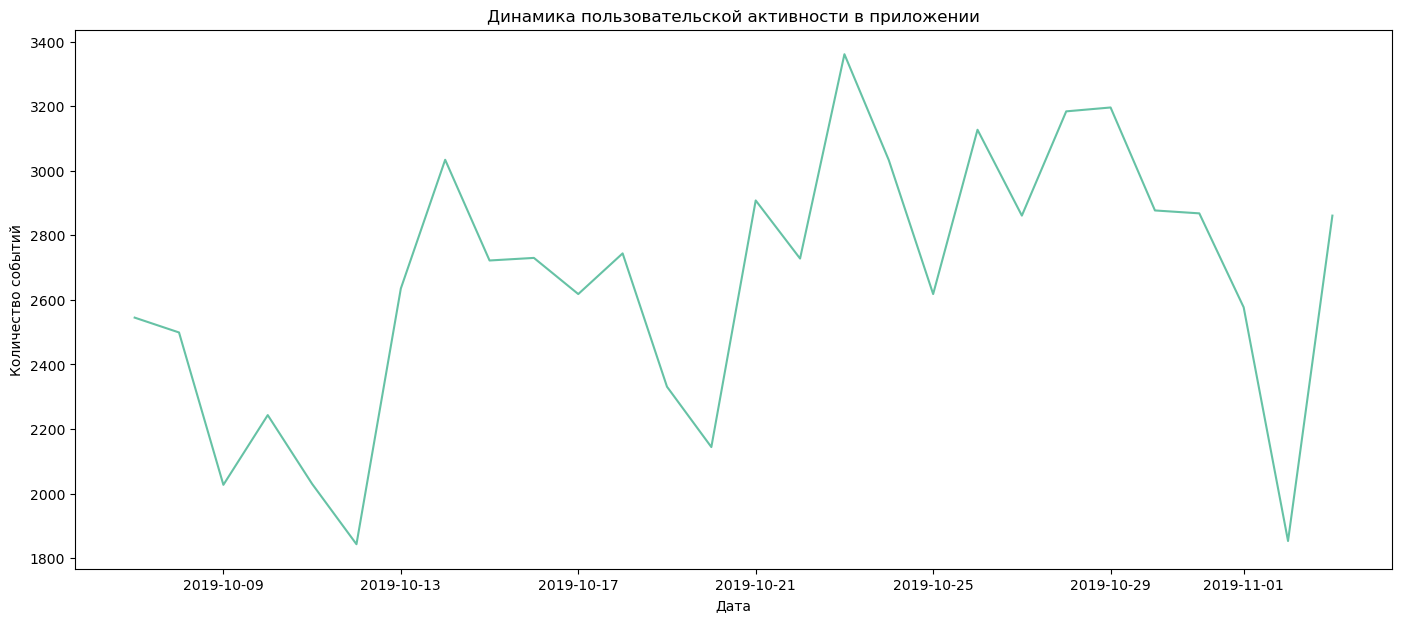

In [78]:
data['date'] = data['event_time'].dt.date
plt.figure(figsize=(17, 7))
activity_per_day = data.pivot_table(index='date',values= 'event_name', aggfunc='count')
sns.lineplot(data=activity_per_day, x='date', y='event_name',color='#66c2a5')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Динамика пользовательской активности в приложении')
plt.show();

**С самого начала исследуемого периода пользователи активно пользовались приложением. Во все дни наблюдается резкое снижение активности ночью и ее стремительный рост после 9 утра.Значит, не будем из анализа убирать начальные даты. В практически все дни совершалось схожее количество событий, однако, с 23 октября активность выросла.** 

## Составление пользовательского профиля

### Расчет среднего количества событий на пользователя

In [20]:
avg_event_count =  data.groupby('user_id').agg({'event_name':'count'}).mean()
avg_event_count

event_name    17.283252
dtype: float64

**В среднем, пользователи совершили 17 действий в мобильном приложении. Посмотрим на медианное значение: оно более показательное.**

### Расчет медианного количества событий на пользователя

In [21]:
median_event_count =  data.groupby('user_id').agg({'event_name':'count'}).median()
median_event_count

event_name    9.0
dtype: float64

**Медиана составляет 9 событий на пользователя. Выглядит более реалистично, чем среднее значение.**

### Изучение распределения значений количества событий на 1  пользователя

**Сначала создадим сводную таблицу c общим количеством действий каждого пользователя.**

In [22]:
median_event_number_info = mobile_dataset.pivot_table(index='user_id', values='event_name', aggfunc='count').reset_index()
median_event_number_info

,user_id,event_name
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35
1,00157779-810c-4498-9e05-a1e9e3cedf93,71
2,00463033-5717-4bf1-91b4-09183923b9df,10
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32
4,00551e79-152e-4441-9cf7-565d7eb04090,8
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,17
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,7
4290,ffcf50d9-293c-4254-8243-4890b030b238,2
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,13


**Перед построением гистограммы для изучения распределения значений.**

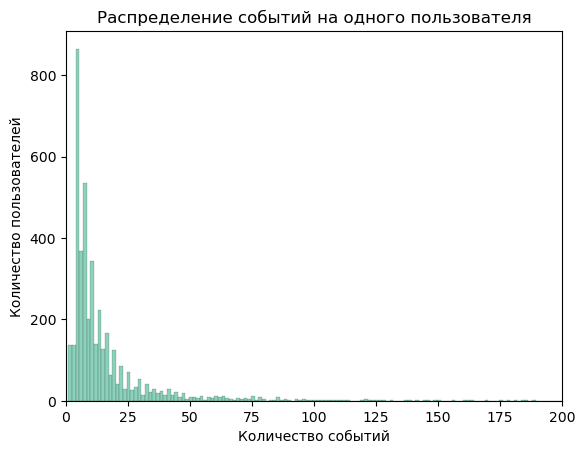

In [23]:
sns.histplot(data=median_event_number_info, x = 'event_name', color='#66c2a5')
plt.xlim(0,200)
plt.title('Распределение событий на одного пользователя')
plt.xlabel('Количество событий')
plt.ylabel('Количество пользователей')
plt.show();

**Чаще всего пользователи совершали 4-6 действий. Количество пользователей с 21 событием и более не превышает 150 человек.**

### Изучение источников привлечения пользователей

**Построим столбчатую диаграмму для выявления самого эффективного источника.**

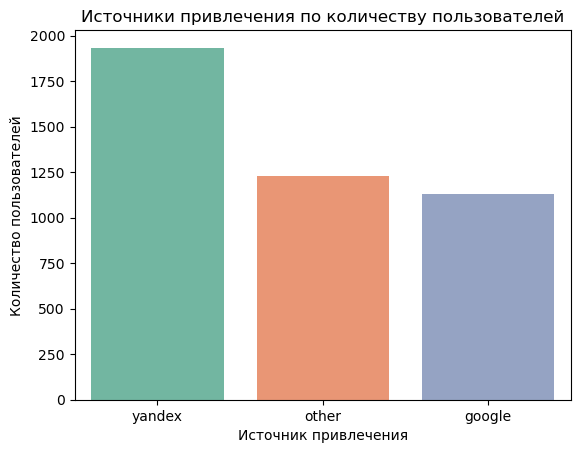

In [24]:
source_info = data.pivot_table(index='source', values='user_id', aggfunc='nunique').reset_index()
source_info =source_info.sort_values(by='user_id',ascending=False)
sns.barplot(data=source_info, x='source', y='user_id',palette='Set2')
plt.title('Источники привлечения по количеству пользователей')
plt.xlabel('Источник привлечения')
plt.ylabel('Количество пользователей')
plt.show();

**Более 1800 пользователей установили приложение с Яндекса, около 1100 - с Google. Почти 1100 пользователей были привлечены из других источников.**

## Анализ событий и их последовательности 

### Изучение частоты событий

**Создадим сводную таблицу, содержащую количество уникальных пользователей, совершивших каждое из действий. На основании данных их сводной таблицы построим столбчатую диаграмму.** 

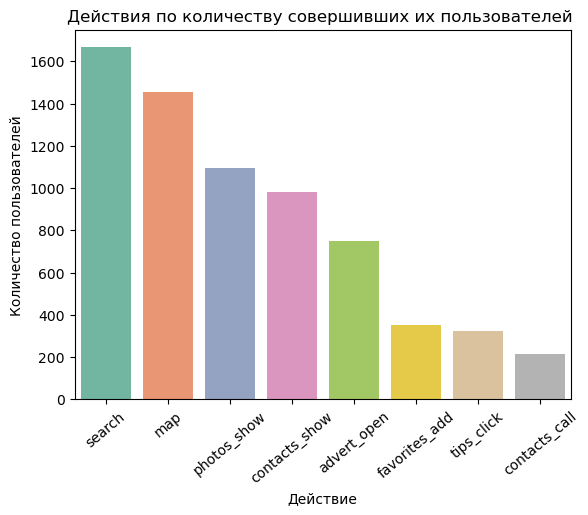

In [25]:
events_users = (
    data.query('event_name != "tips_show"')
    .pivot_table(index='event_name', values='user_id',aggfunc='nunique')
    .sort_values(by='user_id',ascending=False)
    .reset_index()
)
events_users.columns = [
    'event_name',
    'users_total'
]
events_users 

sns.barplot(data=events_users, x = 'event_name', y='users_total', palette='Set2')
plt.title('Действия по количеству совершивших их пользователей ')
plt.xlabel('Действие')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=40)
plt.show();

**Чаще всего пользователи совершали различные действия, связанные с поиском по сайту (около 1700 пользователей). Около 1450 пользователей просмотрелу карту объявлений, около 1300 - просмотрели фотографии объявлений. Целевое событие - просмотр номера телефона, зафиксировано у около 1000 пользователей.**

### Выявление количества пользователей, совершивших целевое действие

**Отфильтруем датафрейм, чтобы узнать количество пользователей, просмотревших контакты.**

In [27]:
contacts_show_users = data[data['event_name']=='contacts_show']['user_id'].unique()
target_event_data = data[data['user_id'].isin(contacts_show_users)]
print('Количество пользователей, совершивших целевое действие:',target_event_data.user_id.nunique())

Количество пользователей, совершивших целевое действие: 981


### Выявление количества сессий

**Перед определением тайм-аута создадим столбец со временем между событиями (в минутах).**

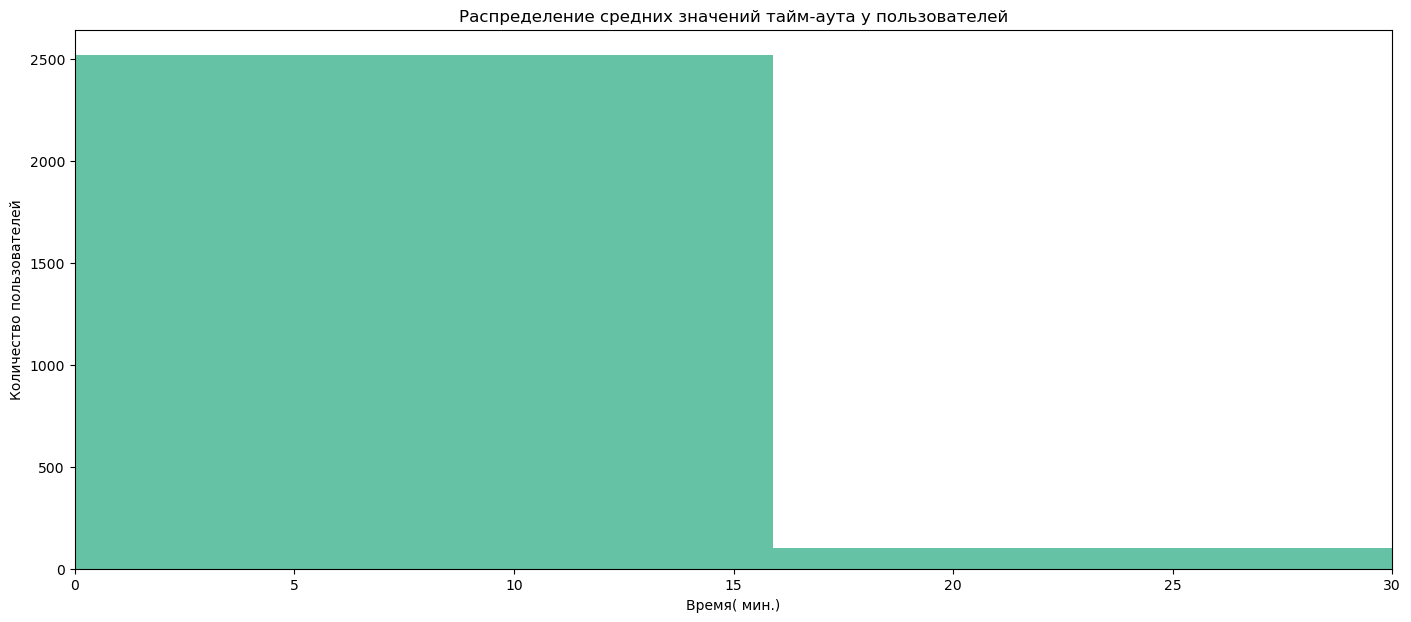

In [28]:
data = data.sort_values(['user_id', 'event_time']) #отсортируем датафрейм по пользователям и событиями

#создаем столбец 
data['diff'] = data.groupby('user_id')['event_time'].diff().dt.total_seconds() / 60

mean_time_diff = data.groupby('user_id')['diff'].mean()
plt.figure(figsize=(17, 7))
plt.hist(mean_time_diff.dropna(),bins=1000, color ='#66c2a5')
plt.xlim(0,30)
plt.xlabel('Время( мин.)')
plt.ylabel('Количество пользователей')
plt.title('Распределение средних значений тайм-аута у пользователей')
plt.show()


**На гистограмме видно, что в большинстве случаев продолжительность таум-аута составляет около 16 минут.**

**Установим тайм-аут 20 минут: этого времени достаточно для того, чтобы пользователи нашли что-то для себя в приложении.**

**Также выявим количество сессий.**

In [29]:
session_df = data.sort_values(['user_id','event_time']).reset_index(drop=True)
a = (session_df.groupby('user_id')['event_time'].diff() > pd.Timedelta('20Min')).cumsum()
session_df['session_id'] = session_df.groupby(['user_id', a], sort=True).ngroup()
session_df = session_df.sort_values(by='event_time')
print('Количество сессий:', session_df.session_id.nunique())

Количество сессий: 10975


### Изучение динамики пользовательской активности по дням (DAU)

**Создадим сводную таблицу, чтобы найти количество уникальных сессий в каждый отдельный день.**

In [30]:
sessions_per_day = session_df.pivot_table(index='dt', values='session_id', aggfunc='nunique').reset_index()

sessions_per_day

,dt,session_id
0,2019-10-07,263
1,2019-10-08,300
2,2019-10-09,292
3,2019-10-10,325
4,2019-10-11,289
5,2019-10-12,241
6,2019-10-13,307
7,2019-10-14,414
8,2019-10-15,419
9,2019-10-16,404


**Аналогично подготовим таблицу для пользователей.**

In [31]:
users_per_day = session_df.pivot_table(index='dt', values='user_id', aggfunc='nunique').reset_index()
users_per_day

,dt,user_id
0,2019-10-07,204
1,2019-10-08,204
2,2019-10-09,227
3,2019-10-10,233
4,2019-10-11,206
5,2019-10-12,178
6,2019-10-13,226
7,2019-10-14,298
8,2019-10-15,303
9,2019-10-16,278


**Отразим на графиках динамику активности в приложении как с учетом сессий, так и уникальных пользователей.**

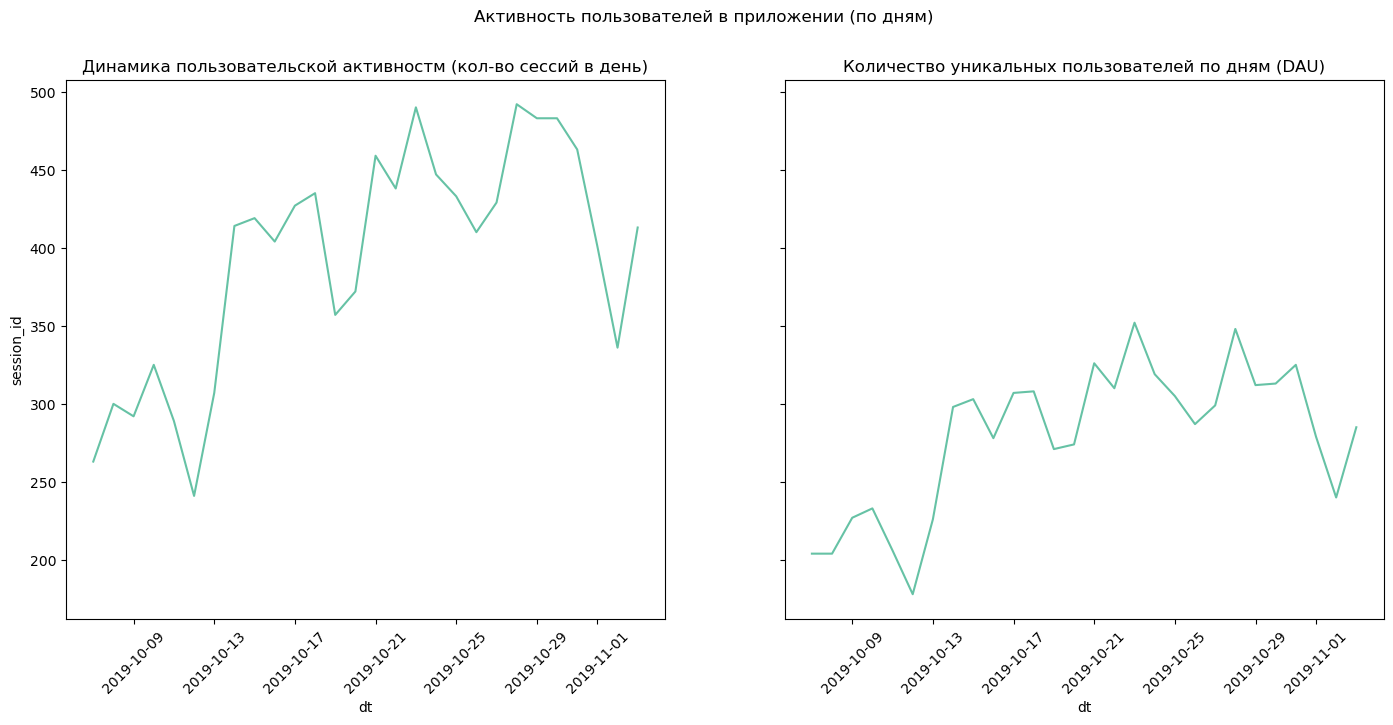

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(17, 7), sharey=True)
fig.suptitle('Активность пользователей в приложении (по дням)')


sns.lineplot(ax=axes[0], x=sessions_per_day.dt, y=sessions_per_day.session_id, color='#66c2a5')
axes[0].set_title('Динамика пользовательской активностм (кол-во сессий в день)')
axes[0].tick_params(axis='x', rotation=45)


sns.lineplot(ax=axes[1], x=users_per_day.dt, y=users_per_day.user_id, color='#66c2a5')
axes[1].set_title('Количество уникальных пользователей по дням (DAU)')
axes[1].tick_params(axis='x', rotation=45);

**Динамика на представленных выше графиках схожа. Несмотря на то, что в определенные дни  (10-12 октября, 16 октября, 18-19 октября) наблюдался отток пользователей и,следовательно, происходило снижение активности, в целом до 22 октября был восходящий тренд активности. 22 октября активность пошла на спад. К концу месяца количество активных пользователей и их сессий почти приблизилось к пиковым значениям, однако, показатели пошли на спад в начале ноября.**

### Изучение пользовательской активности по неделям (WAU)

**Создадим сводную таблицу, чтобы выявить количество сессий в каждую неделю.**

In [33]:
sessions_per_week = session_df.pivot_table(index='week_start', values='session_id', aggfunc='nunique').reset_index()

sessions_per_week

,week_start,session_id
0,2019-10-07,2007
1,2019-10-14,2815
2,2019-10-21,3097
3,2019-10-28,3062


**Аналогично подготовим таблицу с количеством уникальных пользователей в неделю.**

In [34]:
users_per_week = session_df.pivot_table(index='week_start', values='user_id', aggfunc='nunique').reset_index()
users_per_week

,week_start,user_id
0,2019-10-07,1130
1,2019-10-14,1438
2,2019-10-21,1546
3,2019-10-28,1416


**Перейдем к визуализации динамики WAU.**

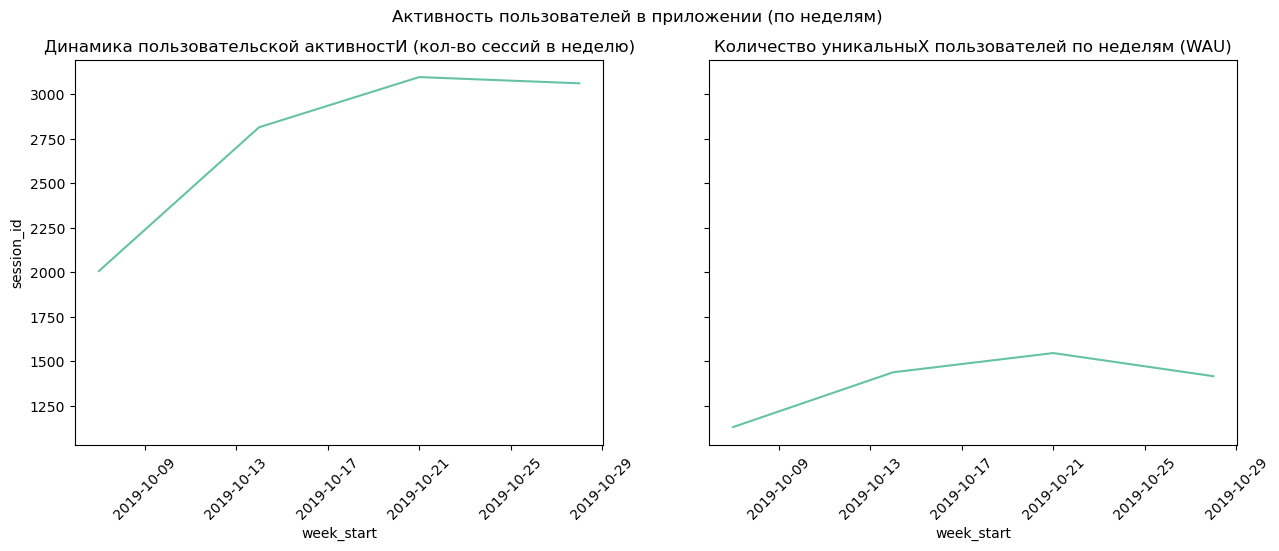

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Активность пользователей в приложении (по неделям)')

sns.lineplot(ax=axes[0], x=sessions_per_week.week_start, y=sessions_per_week.session_id, color='#66c2a5')
axes[0].set_title('Динамика пользовательской активностИ (кол-во сессий в неделю)')
axes[0].tick_params(axis='x', rotation=45)


sns.lineplot(ax=axes[1], x=users_per_week.week_start, y=users_per_week.user_id, color='#66c2a5')
axes[1].set_title('Количество уникальныХ пользователей по неделям (WAU)')
axes[1].tick_params(axis='x', rotation=45);


**На протяжении первых 3 недель наблюдался восходящий тренд активности. 21 октября 2022 г., в начале 4ой недели, произошло замедление активности.**

### Изучение конверсии в целевое действие

**Создадим сводну таблицу для расчета конверсии.**

In [36]:
conversion_info = data.pivot_table(index='event_name',
                                     values='user_id',
                                     aggfunc='nunique',
                                    ).sort_values(by='user_id',ascending=False).reset_index()
#добавим столбец 'perc' c доляии пользователей, совершивших действие, от всех пользователей
conversion_info['perc'] = round(conversion_info['user_id'] / data['user_id'].nunique() * 100,2)
#расчитаем долю пользователей, которая переходит к следующему действию 
conversion_info['stage_loss'] = 100 - conversion_info['perc']
conversion_info

,event_name,user_id,perc,stage_loss
0,tips_show,2801,65.25,34.75
1,search,1666,38.81,61.19
2,map,1456,33.92,66.08
3,photos_show,1095,25.51,74.49
4,contacts_show,981,22.85,77.15
5,advert_open,751,17.49,82.51
6,favorites_add,351,8.18,91.82
7,tips_click,322,7.50,92.50
8,contacts_call,213,4.96,95.04


**Теперь создадим сводную таблицу для пользователей, совершивших целевое действие.**

In [37]:
target_data = data[data['user_id'].isin(contacts_show_users)]
target_data_conversion = target_data.pivot_table(index='event_name',
                                                 values='user_id',
                                                 aggfunc='nunique').sort_values(by='user_id',ascending=False).reset_index()
#расчитаем долю пользователей с целевым событием
target_data_conversion['perc'] = round(target_data_conversion['user_id'] / target_data['user_id'].nunique() * 100,2)
target_data_conversion

,event_name,user_id,perc
0,contacts_show,981,100.00
1,tips_show,516,52.60
2,search,377,38.43
3,photos_show,339,34.56
4,map,289,29.46
5,contacts_call,213,21.71
6,advert_open,138,14.07
7,favorites_add,136,13.86
8,tips_click,100,10.19


**Теперь объединим таблицы и рассчитаем конверсию.**

In [38]:
conversion_df = target_data_conversion.merge(conversion_info, on='event_name')
#удалим столбец stage_loss
conversion_df  = conversion_df.drop('stage_loss', axis=1)
#для удобства переименуем столбцы
conversion_df.columns = ['event_name',
                         'users_target_event',
                         'perc_from_target',
                         'users_total',
                         'perc_from_total'
    
]
#добавим столбец с расчетами конверсии
conversion_df['conversion'] = round(conversion_df['users_target_event'] / conversion_df['users_total'] * 100,2)
conversion_df = conversion_df.sort_values(by='conversion', ascending=False)
conversion_df

,event_name,users_target_event,perc_from_target,users_total,perc_from_total,conversion
0,contacts_show,981,100.00,981,22.85,100.00
5,contacts_call,213,21.71,213,4.96,100.00
7,favorites_add,136,13.86,351,8.18,38.75
8,tips_click,100,10.19,322,7.50,31.06
3,photos_show,339,34.56,1095,25.51,30.96
2,search,377,38.43,1666,38.81,22.63
4,map,289,29.46,1456,33.92,19.85
1,tips_show,516,52.60,2801,65.25,18.42
6,advert_open,138,14.07,751,17.49,18.38


**По итогам расчетов конверсии можно прийти к выводу о том, что добавление объявления в "избранное", а также переход на страницу рекомендованного объявления и просмотр фотографий  повышают вероятность совершения целевого действия.**

### Выявление количества сессий, когда совершалось целевое действие 

**На графиках выше видно, что в течение первых 3 недель росло количество активных пользователей. Поскольку пользователей становилось больше, увеличивалось и количество сессий. На 4ой неделе,однако, произошел спад активности.**

In [39]:
contacts_show_sessions = session_df[session_df['event_name']=='contacts_show']['session_id'].nunique()
print('Количество сессий с целевым действием:', contacts_show_sessions)

Количество сессий с целевым действием: 1796


### Изучение сценариев в приложении: диаграмма Санкея

**Построим диаграмму Санкея для определения основных сценариев пользовательского поведения в приложении.**

In [40]:
def add_features(session_df):
    
    # сортируем по id и времени
    sorted_df = session_df.sort_values(by=['session_id', 'event_time']).copy()
    # добавляем шаги событий
    sorted_df['step'] = sorted_df.groupby('session_id').cumcount() + 1
    
    # добавляем узлы-источники и целевые узлы
    # узлы-источники - это сами события
    sorted_df['source'] = sorted_df['event_name']
    # добавляем целевые узлы
    sorted_df['target'] = sorted_df.groupby('session_id')['source'].shift(-1)
    #удалим повторяющиеся события
    sorted_df = sorted_df.query('source != target').reset_index()
    
    # возврат таблицы без имени событий
    return sorted_df.drop(['event_name'], axis=1)
  
# преобразуем таблицу
session_df = add_features(session_df)
session_df.head()

,index,event_time,user_id,dt,week_number,week_start,source,diff,session_id,step,target
0,8,2019-10-07 13:49:41.716617,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,41,2019-10-07,tips_show,2.147606,0,9,NaN
1,10,2019-10-09 18:35:28.260975,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,41,2019-10-07,map,1.544717,1,2,tips_show
2,12,2019-10-09 18:42:22.963948,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,41,2019-10-07,tips_show,1.903753,1,4,NaN
3,14,2019-10-21 19:53:17.165009,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,43,2019-10-21,tips_show,0.773101,2,2,map
4,15,2019-10-21 19:53:38.767230,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-21,43,2019-10-21,map,0.360037,2,3,tips_show


**Теперь установим максимальное количество шагов в сессии. Для этого сначала посмотрим на распределение значений столбца 'step'.** 

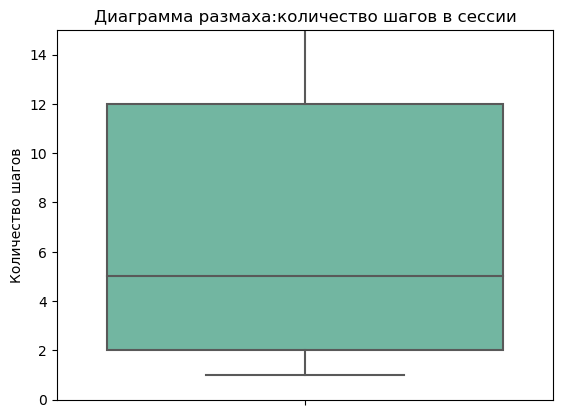

In [41]:
sns.boxplot(y='step', data=session_df, color='#66c2a5')
plt.title('Диаграмма размаха:количество шагов в сессии')
plt.ylabel('Количество шагов')
plt.ylim(0,15)
plt.show();

**Медианное значение - это 5 шагов. В 75% сессий было совершено не более 12 шагов. Ограничим количество шагов 5.**

In [42]:
data_2 = session_df[session_df['step'] <= 5].copy().reset_index(drop=True)

In [43]:
def get_source_index(session_df):
    
    """Функция генерации индексов source

    Args:
        df (pd.DataFrame): исходная таблица с признаками step, source, target.
    Returns:
        dict: словарь с индексами, именами и соответсвиями индексов именам source.
    """
    
    res_dict = {}
    
    count = 0
    # получаем индексы источников
    for no, step in enumerate(data_2['step'].unique().tolist()):
        # получаем уникальные наименования для шага
        res_dict[no+1] = {}
        res_dict[no+1]['sources'] = data_2[data_2['step'] == step]['source'].unique().tolist()
        res_dict[no+1]['sources_index'] = []
        for i in range(len(res_dict[no+1]['sources'])):
            res_dict[no+1]['sources_index'].append(count)
            count += 1
            
    # соединим списки
    for key in res_dict:
        res_dict[key]['sources_dict'] = {}
        for name, no in zip(res_dict[key]['sources'], res_dict[key]['sources_index']):
            res_dict[key]['sources_dict'][name] = no
    return res_dict
  

# создаем словарь
source_indexes = get_source_index(session_df)

In [44]:
def generate_random_color():
    
    """Случайная генерация цветов rgba

    Args:
        
    Returns:
        str: Строка со сгенерированными параметрами цвета
    """
    
    # сгенерим значение для каждого канала
    r, g, b = np.random.randint(255, size=3)
    return f'rgba({r}, {g}, {b}, 1)'

In [45]:
def colors_for_sources(mode):
    
    """Генерация цветов rgba

    Args:
        mode (str): сгенерировать случайные цвета, если 'random', а если 'custom' - 
                    использовать заранее подготовленные
    Returns:
        dict: словарь с цветами, соответствующими каждому индексу
    """
    # словарь, в который сложим цвета в соответствии с индексом
    colors_dict = {}
    
    if mode == 'random':
        # генерим случайные цвета
        for label in df_comp['source'].unique():
            r, g, b = np.random.randint(255, size=3)            
            colors_dict[label] = f'rgba({r}, {g}, {b}, 1)'
            
    elif mode == 'custom':
        # присваиваем ранее подготовленные цвета
        colors = requests.get('https://raw.githubusercontent.com/rusantsovsv/senkey_tutorial/main/json/colors_senkey.json').json()
        for no, label in enumerate(data_2['source'].unique()):
            colors_dict[label] = colors['custom_colors'][no]
            
    return colors_dict
  

colors_dict = colors_for_sources(mode='custom')

In [46]:
def percent_users(sources, targets, values):
    
    """
    Расчет уникальных id в процентах (для вывода в hover text каждого узла)
    
    Args:
        sources (list): список с индексами source.
        targets (list): список с индексами target.
        values (list): список с "объемами" потоков.
        
    Returns:
        list: список с "объемами" потоков в процентах
    """
    
    # объединим источники и метки и найдем пары
    zip_lists = list(zip(sources, targets, values))
    
    new_list = []
    
    # подготовим список словарь с общим объемом трафика в узлах
    unique_dict = {}
    
    # проходим по каждому узлу
    for source, target, value in zip_lists:
        if source not in unique_dict:
            # находим все источники и считаем общий трафик
            unique_dict[source] = 0
            for sr, tg, vl in zip_lists:
                if sr == source:
                    unique_dict[source] += vl
                    
    # считаем проценты
    for source, target, value in zip_lists:
        new_list.append(round(100 * value / unique_dict[source], 1))
    
    return new_list

In [47]:
def lists_for_plot(source_indexes=source_indexes, colors=colors_dict, frac=10):
    
    """
    Создаем необходимые для отрисовки диаграммы переменные списков и возвращаем
    их в виде словаря
    
    Args:
        source_indexes (dict): словарь с именами и индексами source.
        colors (dict): словарь с цветами source.
        frac (int): ограничение на минимальный "объем" между узлами.
        
    Returns:
        dict: словарь со списками, необходимыми для диаграммы.
    """
    
    sources = []
    targets = []
    values = []
    labels = []
    link_color = []
    link_text = []

    # проходим по каждому шагу
    for step in tqdm(sorted(session_df['step'].unique()), desc='Шаг'):
        if step + 1 not in source_indexes:
            continue

        # получаем индекс источника
        temp_dict_source = source_indexes[step]['sources_dict']

        # получаем индексы цели
        temp_dict_target = source_indexes[step+1]['sources_dict']

        # проходим по каждой возможной паре, считаем количество таких пар
        for source, index_source in tqdm(temp_dict_source.items()):
            for target, index_target in temp_dict_target.items():
                # делаем срез данных и считаем количество id            
                temp_df = data_2[(data_2['step'] == step)&(data_2['source'] == source)&(data_2['target'] == target)]
                value = len(temp_df)
                # проверяем минимальный объем потока и добавляем нужные данные
                if value > frac:
                    sources.append(index_source)
                    targets.append(index_target)
                    values.append(value)
                    # делаем поток прозрачным для лучшего отображения
                    link_color.append(colors[source].replace(', 1)', ', 0.2)'))
                    
    labels = []
    colors_labels = []
    for key in source_indexes:
        for name in source_indexes[key]['sources']:
            labels.append(name)
            colors_labels.append(colors[name])
            
    # посчитаем проценты всех потоков
    perc_values = percent_users(sources, targets, values)
    
    # добавим значения процентов для howertext
    link_text = []
    for perc in perc_values:
        link_text.append(f"{perc}%")
    
    # возвратим словарь с вложенными списками
    return {'sources': sources, 
            'targets': targets, 
            'values': values, 
            'labels': labels, 
            'colors_labels': colors_labels, 
            'link_color': link_color, 
            'link_text': link_text}
  

# создаем словарь
data_for_plot = lists_for_plot()

Шаг: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 132/132 [00:00<00:00, 157.39it/s]


In [48]:
def plot_senkey_diagram(data_dict=data_for_plot):    
    
    """
    Функция для генерации объекта диаграммы Сенкей 
    
    Args:
        data_dict (dict): словарь со списками данных для построения.
        
    Returns:
        plotly.graph_objs._figure.Figure: объект изображения.
    """
    
    fig = go.Figure(data=[go.Sankey(
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 50,
          thickness = 15,
          line = dict(color = "black", width = 0.1),
          label = data_dict['labels'],
          color = data_dict['colors_labels']
        ),
        link = dict(
          source = data_dict['sources'],
          target = data_dict['targets'],
          value = data_dict['values'],
          label = data_dict['link_text'],
          color = data_dict['link_color']
      ))])
    fig.update_layout(title_text="Sankey Diagram", font_size=10, width=1000, height=600)
    
    # возвращаем объект диаграммы
    return fig
  

# сохраняем диаграмму в переменную
senkey_diagram = plot_senkey_diagram()

In [49]:
senkey_diagram.show()

In [50]:
senkey_diagram.write_html('demo_senkey.html', auto_open=True)

### Изучение наиболее распространенных сценариев в приложении

**При помощи диаграммы Санкея получилось выявить несколько основных сценариев, по которым пользователи доходят до целевого действия (contacts_show).**
 
    Cценарий 1:
    -поиск по сайту (search);
    -просмотр фотографий (photos show);
    -просмотр контактов (contacts show).
    
    Cценарий 2:
    -просмотр карты объявлений (map);
    -открытие карточки объявлений (advert open);
    -просмотр рекомендаций (tips show);
    -просмотр контактов (contacts show).
    
    Сценарий 3:
    -поиск по сайту (search);
    -просмотр карты объявлений (map);
    -просмотр рекомендаций (tips show);
    -просмотр контактов (contacts show)

**Построим воронку событий для сценария №1 (search activity - tips show - contacts show).**

In [51]:
#фильтруем данные так, чтобы получить число уникальных пользователей, совершивших 3 действия
search_users = data.query('event_name == "search"')['user_id'].unique().tolist()
photos_show = data.query('event_name =="photos_show" and user_id==@search_users')['user_id'].unique().tolist()
contacts_show = data.query('event_name == "contacts_show" and user_id==@photos_show')['user_id'].unique().tolist()

In [52]:
fig = go.Figure(go.Funnel(
    y=["Поиск по сайту", "Просмотр фотографий", "Просмотр контактов"],
    x=[len(search_users),len(photos_show), len(contacts_show)],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["#66c2a5", "#fc8d62", "#8da0cb"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["#66c2a5", "#fc8d62", "#8da0cb"]}},
    connector = {"line": {"color": "#66c2a5", "dash": "dot", "width": 3}})
    )
fig.update_layout(title='Воронка событий: сценарий №1')
fig.show()

**1666 человек сначала осуществляют поиск по сайту. Лишь 39% из них пересмотрят к просмотру фотографий, а из тех, кто посмотрел фотографии, менее четверти просматривают контактные данные. Из тех пользователей, кто действует в приложении по первому сценарию, 12% доходят до просмотра контактов.**

**Подготовим данные для сценария №2.**

In [53]:
map_users = data.query('event_name == "map"')['user_id'].unique().tolist()
advert_open_show = data.query('event_name =="advert_open" and user_id==@map_users')['user_id'].unique().tolist()
tip_show_users1 = data.query('event_name == "tips_show" and user_id==@advert_open_show')['user_id'].unique().tolist()
contacts_show_users1 = data.query('event_name == "contacts_show" and user_id==@tip_show_users1')['user_id'].unique().tolist()

In [54]:
fig = go.Figure(go.Funnel(
    y=["Просмотр карты объявлений", "Открытие карточки объявлений",
       "Просмотр рекомендаций","Просмотр контактов"],
    x=[len(map_users),len(advert_open_show), len(tip_show_users1), len(contacts_show_users1)],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["#66c2a5", "#fc8d62", "#8da0cb","#e78ac3"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"]}},
    connector = {"line": {"color": "#66c2a5", "dash": "dot", "width": 3}})
    )
fig.update_layout(title='Воронка событий: сценарий №2')
fig.show()

**По второму сценарию (map- advert open - tips show - просмотр контактов) сильный отток пользователей происходит после совершения первого действия - просмотра карт; лишь 36% пользователей переходят ко второму действию (открытие карточки объявлений). Более трети (32% пользователей) переходят к просмотру рекомендаций,однако до целевого действия доходят лишь 5% пользователей.**

**Теперь перейдем к построению воронки для сценария №3.**

In [55]:
search_users1 = data.query('event_name == "search"')['user_id'].unique().tolist()
map_users1 = data.query('event_name =="map" and user_id==@search_users1')['user_id'].unique().tolist()
tip_show_users2 = data.query('event_name =="tips_show" and user_id==@map_users1')['user_id'].unique().tolist()
contacts_show_users2 = data.query('event_name =="contacts_show" and user_id==@tip_show_users2')['user_id'].unique().tolist()

In [56]:
fig = go.Figure(go.Funnel(
    y=["Поиск по сайту", "Просмотр карты объявлений",
       "Просмотр рекомендаций","Просмотр контактов"],
    x=[len(search_users1),len(map_users1), len(tip_show_users2), len(contacts_show_users2)],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["#66c2a5", "#fc8d62", "#8da0cb","#e78ac3"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"]}},
    connector = {"line": {"color": "#66c2a5", "dash": "dot", "width": 3}})
    )
fig.update_layout(title='Воронка событий: сценарий №3')
fig.show()

** Из тех, кто сделал данное действие, 91% переходят к просмотру рекомендаций. Лишь 5% всех пользователей, действующих по этому сценарию, доходят до просмотра контактов.**По третьему сценарию (search-activity - map - tips show - contacts show) лишь 28% после поиска по сайту просматривают карту объявлений.

    В результате анализа воронок событий можно прийти к следующим выводам:
        -происходит большой отток пользователей на этапе поиска по сайту и просмотра карты объявлений;
        -многие пользователи, увидев рекомендации, так и не переходят на страницу объявления, и ,следовательно, не 
        просматривают контакты (целевое действие);
        -из изученных сценариев выделается первый: по нему конверсия в целевое действие в более чем 2 раза выше, чем 
        при остальных сценариях. 

## Статистический анализ

### Проверка гиптезы №1

    Нулевая гипотеза - "конверсия у пользователей, совершающих действия и tips_show и tips_click, и тех, кто, кто совершает только tips_show, одинакова"; 
    Альтернативная гипотеза -  "конверсия в просмотры контактов различается у пользователей, совершающих действия и 
    tips_show и tips_click, и тех, кто, кто совершает только tips_show".

**Сначала узнаем количество пользователей, совершивших действие tips_show (увидели рекомендованные объявления).**

In [57]:
tips_show_only_users = data.query('event_name == "tips_show"')['user_id'].unique().tolist()
print('Количество пользователей, увидевших рекомендованные объявления:', len(tips_show_only_users))

Количество пользователей, увидевших рекомендованные объявления: 2801


**Теперь выявим количество пользователей, кто и увидел рекомендации, и перешел на страницу с ними и при этом дошел до целевого действия.**

In [58]:
tips_show_click_users_info = data.query('event_name =="tips_click" and user_id == @tips_show_only_users')['user_id'].unique().tolist()
print('Количество пользователей, увидевших рекомендованные объявления и перешедших на страницу с ними:', len(tips_show_click_users_info))

Количество пользователей, увидевших рекомендованные объявления и перешедших на страницу с ними: 297


**Построим сводную таблицу для того, чтобы рассчитать конверсию в целевое действие у пользователей, совершивших и tips_show, и tips_click.**

In [59]:
tips_click_show = data.query('user_id == @tips_show_click_users_info')
tips_click_show_conversion = tips_click_show.pivot_table(index='event_name',
                                                        values='user_id',
                                                        aggfunc='nunique').sort_values(by='user_id',ascending=False).reset_index()
tips_click_show_conversion['perc'] = round(tips_click_show_conversion['user_id'] / data['user_id'].nunique() * 100, 2)
tips_click_show_conversion['stage_loss'] = 100 - tips_click_show_conversion['perc']
tips_click_show_conversion 

,event_name,user_id,perc,stage_loss
0,tips_click,297,6.92,93.08
1,tips_show,297,6.92,93.08
2,map,140,3.26,96.74
3,contacts_show,91,2.12,97.88
4,search,74,1.72,98.28
5,advert_open,58,1.35,98.65
6,favorites_add,28,0.65,99.35
7,photos_show,4,0.09,99.91


In [60]:
fig = go.Figure(go.Funnel(
    y=["Просмотр рекомендации", "Переход на страницу рекомендованного объявления",
       "Просмотр карты объявлений", "Просмотр контактов"],
    x=[tips_click_show_conversion['user_id'][0],
       tips_click_show_conversion['user_id'][1],
       tips_click_show_conversion['user_id'][2],
       tips_click_show_conversion['user_id'][3]],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["#66c2a5", "#fc8d62", "#8da0cb","#e78ac3"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"]}},
    connector = {"line": {"color": "#66c2a5", "dash": "dot", "width": 3}})
    )
fig.update_layout(title='Воронка событий: пользователи,совершившие и tips_show, и tips_click')
fig.show()

**Из пользователей, которые совершают и tips_show, и tips_click  более трети (31%) доходят до целевого действия. Дальше посмотрим конверсию у второй группы.**

**Узнаем, сколько пользователей увидели рекомендованные объявления, но не перешли на страницы с ним.**

In [61]:
tips_show_only = list(set(tips_show_only_users) - set(tips_show_click_users_info))
print('Количество пользователей, кто не перешел на страницы рекомендованных объявлений:',len(tips_show_only))

Количество пользователей, кто не перешел на страницы рекомендованных объявлений: 2504


**Теперь выявим количество тех из них, кто совершил целевое действие.**

In [62]:
#cоздаем датафрейм для пользователей, совершившиз только tips_show
tips_show_only_df = data.query('user_id == @tips_show_only')
#аналогично для тех, кто совершил и tips show, и tips click
tips_show_click_df = data.query('user_id == @tips_show_click_users_info ')
#получим список с пользователями, которые совершили целевое действие
contact_show_users = data.query('event_name == "contacts_show"')['user_id']

tips_show_only_df = tips_show_only_df[tips_show_only_df['user_id'].isin(contact_show_users)]
tips_show_only_users = tips_show_only_df.user_id.unique().tolist()
print('Количество пользователей, кто только увидел рекомендации и сделал целевое действие:', len(tips_show_only_users ))
tips_show_click_df = tips_show_click_df[tips_show_click_df['user_id'].isin(contact_show_users)]
tips_show_click_users = tips_show_click_df.user_id.unique().tolist()
print('Количество пользователей, кто увидел рекомендации и перешел на страницв с ними, а также сделал целевое действие:', len(tips_show_click_users))


Количество пользователей, кто только увидел рекомендации и сделал целевое действие: 425
Количество пользователей, кто увидел рекомендации и перешел на страницв с ними, а также сделал целевое действие: 91


**Расчитаем конверсию для второй группы.**

In [63]:
tips_show = data.query('user_id == @tips_show_only')
tips_show_conversion = tips_show.pivot_table(index='event_name',
                                             values='user_id',
                                             aggfunc='nunique').sort_values(by='user_id',ascending=False).reset_index()
tips_show_conversion['perc'] = round(tips_show_conversion['user_id'] / data['user_id'].nunique() * 100, 2)
tips_show_conversion['stage_loss'] = 100 - tips_show_conversion['perc']
tips_show_conversion 

,event_name,user_id,perc,stage_loss
0,tips_show,2504,58.33,41.67
1,map,1212,28.23,71.77
2,search,727,16.93,83.07
3,advert_open,532,12.39,87.61
4,contacts_show,425,9.90,90.10
5,favorites_add,80,1.86,98.14
6,photos_show,9,0.21,99.79
7,contacts_call,1,0.02,99.98


In [64]:
fig = go.Figure(go.Funnel(
    y=["Просмотр рекомендации",
       "Просмотр карты объявлений", 
       "Поиск по сайту",
       "Открытие карточки объявления",
       "Просмотр контактов"],
    x=[tips_show_conversion['user_id'][0],
       tips_show_conversion['user_id'][1],
       tips_show_conversion['user_id'][2],
       tips_show_conversion['user_id'][3],
       tips_show_conversion['user_id'][4]],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["#66c2a5", "#fc8d62", "#8da0cb","#e78ac3","#e78ac3"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#e78ac3"]}},
    connector = {"line": {"color": "#66c2a5", "dash": "dot", "width": 3}})
    )
fig.update_layout(title='Воронка событий: пользователи,совершившие только tips_show')
fig.show()

**17% пользователей, совершивших только tips_show, доходят до целевого действия.**

**Переходим к тестированию гипотезы.**

In [65]:
alpha = .05 #задаем критический уровень статистической значимости
        
successes = np.array([len(tips_show_click_users),
                      len(tips_show_only_users)
                     ])
                                 
trials = np.array([len(tips_show_click_users_info),
                   len(tips_show_only)
                  ])

#конверсия в первой группе:
p1 = successes[0] / trials[0] 
#конверсия во второй группе
p2 = successes[1] / trials[1] 
    
#конверсия в комбинированном датасете
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1]) 

    
# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
    
print('p-значение:', p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть существенные различия в конверсии")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 9.218316554537864e-09
Отвергаем нулевую гипотезу: есть существенные различия в конверсии


**По результатам статистического теста нам нужно принять альтернативную гипотезу: конверсия в просмотры контактов различается у пользователей, совершающих действия и tips_show и tips_click, и тех, кто, кто совершает только tips_show. Таким образом, можно прийти к выводу о том, что выполнение tips_show в комбинации с tips_click влияет на реализацию целевого действия в приложении.**

### Проверка гипотезы №2

      Нулевая гипотеза: "конверсия у пользователей; просмотревших фотографии, и тех, кто пропустил этот шаг, одинаковая".
      
      Альтернативная гипотеза: "cуществуют значимые различия в конверсии у пользователей; просмотревших фотографии, и тех, кто пропустил этот шаг".

**Сначала узнаем количество пользователей, просмотревших фотографии.**

In [66]:
photos_show = data.query('event_name == "photos_show"')['user_id'].unique().tolist()
print('Количество пользователей, просмотревших фотографии:', len(photos_show))

Количество пользователей, просмотревших фотографии: 1095


**Теперь узнаем количество пользователей, которые не просмотрели фотографии.**

In [67]:
all_users = data.user_id.unique().tolist()
no_photos_show = list(set(all_users) - set(photos_show))
print('Количество пользователей, которые не смотрели фотографии:', len(no_photos_show))

Количество пользователей, которые не смотрели фотографии: 3198


**Узнаем количество людей, кто просмотрел фотографии и сделал целевое действие и тех, кто не просмотрел фотографии, но также совершил целевое действие.**

In [68]:
#cоздаем датафрейм для пользователей, просмотревших фотографии
photos_show_df = data.query('user_id == @photos_show')
#аналогично для тех, кто совершил не просмотрел фотографии
no_photos_show_df = data.query('user_id == @no_photos_show')
#получим список с пользователями, которые совершили целевое действие
contact_show_users = data.query('event_name == "contacts_show"')['user_id']

photos_show_df = photos_show_df[photos_show_df['user_id'].isin(contact_show_users)]
photos_show_users = photos_show_df.user_id.unique().tolist()
print('Количество пользователей, кто просмотрел фотографии и сделал целевое действие:', len(photos_show_users))
no_photos_show_df = no_photos_show_df[no_photos_show_df['user_id'].isin(contact_show_users)]
no_photos_show_users = no_photos_show_df.user_id.unique().tolist()
print('Количество пользователей, кто не просмотрел фотографии и сделал целевое действие:', len(no_photos_show_users))

Количество пользователей, кто просмотрел фотографии и сделал целевое действие: 339
Количество пользователей, кто не просмотрел фотографии и сделал целевое действие: 642


**Переходим к статистическому тесту.**

In [69]:
alpha = .01 #задаем критический уровень статистической значимости
        
successes = np.array([len(photos_show_users),
                      len(no_photos_show_users)
                     ])
                                 
trials = np.array([len(photos_show),
                   len(no_photos_show)
                  ])

print(successes, trials) # КОД РЕВЬЮЕРА

#конверсия в первой группе:
p1 = successes[0] / trials[0] 
#конверсия во второй группе
p2 = successes[1] / trials[1] 
    
#конверсия в комбинированном датасете
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1]) 

    
# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1]))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
    
print('p-значение:', p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть существенные различия в конверсии")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

[339 642] [1095 3198]
p-значение: 1.3278267374516872e-13
Отвергаем нулевую гипотезу: есть существенные различия в конверсии


**По результам теста нам нужно принять альтернативную гипотезу: "cуществуют значимые различия в конверсии у пользователей; просмотревших фотографии, и тех, кто пропустил этот шаг". Мы приходим к выводу о том, что фактор просмотра фотографий влияет на конверсию в целевое действие.**

## Выводы

     Для того, чтобы выявить, какие шаги влияют на конверсию в целевое действие (просмотр контактов) в исследовании
     были предприняты следующие шаги:
     
        -открытие и изучение файла;
        -предобработка данных, включающая в себя изучение типов данных в датафреймах, его изменение в случае необходимости,
         проверка датафреймов на наличие пропусков, дубликатов(как явных, так и неявных), а также объединение датафреймов и 
         добавление новых столбцов(с днем, номером недели и датой начала недели);
        -выявление количества логов, а также уникальных пользователей в датафрейме; 
        -изучение периода проведения эксперимента, в частности выявление даты его начала и завершения;
        -выявление среднего и медианного количества событий на пользователя;
        -изучение источников привлечения пользователей посредством построения сводной таблицы и столбчатой диаграммы;
        -изучение частоты событий посредством построения сводной таблицы и столбчатой диаграмму;
        -выявление количества пользователей, совершивших целевое действие;
        -выявление среднего значения тайм-аута и последующее выявление количества сессий;
        -изучение таких показателей как DAU и WAU;
        -построение диаграммы Санкея для выявления наиболее распространенных сценариев совершения целевого действия;
        -расчет конверсии для пользователей, которые дошли до целевого действия по разным сценариям;
        -построение воронок событий;
        -статистический анализ данных, включающий в себя проверку 2 гипотез:
        
           Гипотеза 1(нулевая): "конверсия у пользователей, совершающих действия и tips_show и tips_click, и тех, кто
           совершает только tips_show, одинакова"; 
           Гипотеза 1(альтернативная): "Альтернативная гипотеза -  "конверсия в просмотры контактов различается у 
           пользователей, совершающих действия и tips_show и tips_click, и тех, кто, кто совершает только tips_show".

           Гипотеза 2(нулевая): "конверсия у пользователей; просмотревших фотографии, и тех, кто пропустил этот шаг, 
           одинаковая".
           Гипотеза 2 (альтернативная): "cуществуют значимые различия в конверсии у пользователей; просмотревших фотографии,
           и тех, кто пропустил этот шаг".
    

      Следуя данному алгоритму, удалось установить, что в исследуемый период 932 пользователя совершили целевое действие. 
    
      При помощи диаграммы Санкея было выявлено 3 следующих сценария, по которым пользователи доходили до просмотра 
         контактов:
    
          Cценарий 1:
          -поиск по сайту (search);
          -просмотр фотографий (photos show);
          -просмотр контактов (contacts_show).
    
          Cценарий 2:
          -просмотр карты объявлений (map);
          -открытие карточки объявлений (advert open);
          -просмотр рекомендаций (tips show);
          -просмотр контактов (contacts show).
    
          Сценарий 3:
          -поиск по сайту (search);
          -просмотр карты объявлений (map);
          -просмотр рекомендаций (tips show);
          -просмотр контактов (contacts show)
    
          Изучение воронок событий для каждого отдельного сценария помогло нам найти события, которые негативно сказываются
    на конверсии в целевое действие. Во-первых, наблюдается сильный отток пользователей после поиска по сайту; это может 
    свидетельствовать о том, что пользователи не смогли для себя объявления. Возможно, в приложении не хватает функционала
    для поисковых действий. Во-вторых, многие пользователи "ушли", посмотрев карту объявлений; либо они не нашли актуальных 
    объявлений в своей локации, либо у них возникли трудности с их нахождением, что указывает на  недоработки в приложении.
    В-третьих, существенная доля пользователей, увидев рекомендованные объявления, так и не посмотрели их страницы и, 
    следовательно, не совершили целевое действие. Уместно предположить, что столь заметный отток пользователей связан с тем,
    что рекомендации не всегда учитывают пользовательские предпочтения. 
    
          Статистический анализ показал, что некоторые действия оказывают влияние на конверсию в целевое действие. По
     итогам 2 тестов мы придерживаемся гипотезы о том, что существуют значимые различия в конверсии пользователей, которые 
     совершили и  tips_show, и tips_click и теми, кто сделал только tips_show. Также мы придерживаемся гипотезы
     о существовании разницы в  конверсии пользователей, просмотревших фотографии на странице объявлений, и теми, кто
     этот шаг пропустил. Таким образом, мы приходим к выводу о том, что существует положительная корреляция между 2 
     событями, - переходом на страницу объявлений и просмотром фотографий, и совершением целевого действия. 
     
          Для того, чтобы повысить конверсию в целевое действие, рекомендуется улучшить UX. Например, поскольку наблюдается
      отток пользователей после просмотра карты, нужно добавить опцию просмотра списка объявлений на странице с картой; так 
      повышается вероятность того, что пользователи увидят объявление, которе их заинтересует. Для того, чтобы сделать
      интерфейс более user_friendly, также необходимо улучшить систему поиска по сайту. Было выявлено, что
      половина  пользователей не переходит на страницы рекомендованных объявлений. Дело может быть в том, что
      пользовательские предпочтения не учитываются с высокой степенью течности: это указывает на важность улучшения
      алгоритма для прогнозирования предпочтений. 
 
   
    
    
    
    
    